# Problem 4
## Problem 4.1

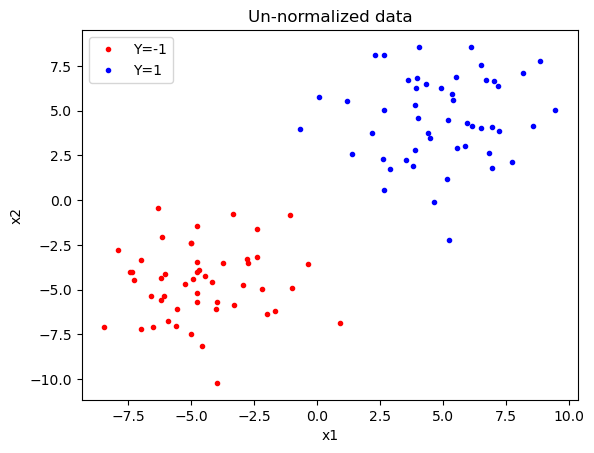

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#initialize an array of zeros to store the samples

X = np.zeros((100,2))
Y = np.zeros((100,1),dtype= int)

#configure the negative values
Y[0:50] = -1
mean = [-5,-5]
cov = [[5,0],[0,5]]
X[0:50] = np.random.multivariate_normal(mean,cov,50)

#configure the positive values
Y[50:] = 1
mean = [5,5]
cov = [[5,0],[0,5]]
X[50:] = np.random.multivariate_normal(mean,cov,50)

plt.plot(X[0:50,0],X[0:50,1],'r.',label="Y=-1")
plt.plot(X[50:,0],X[50:,1],'b.',label="Y=1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Un-normalized data")
plt.legend()
plt.show()

## Problem 4.2


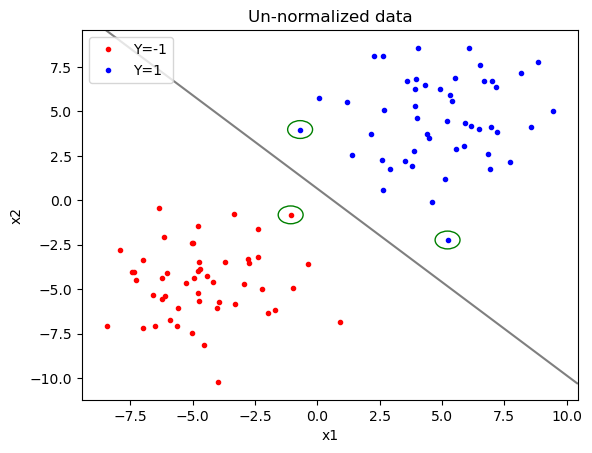

In [2]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

clf = svm.SVC(kernel="linear", C=1)
clf.fit(X,Y.transpose()[0])
support_vectors = clf.support_vectors_

ax = plt.gca()

#plot the points
plt.plot(X[0:50,0],X[0:50,1],'r.',label="Y=-1")
plt.plot(X[50:,0],X[50:,1],'b.',label="Y=1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Un-normalized data")
plt.legend()


#put a circle around the support vectors
for point in support_vectors:
    cir = plt.Circle(point,0.5,color='g',fill = False)
    ax.add_patch(cir)

#can clf.coef_
clf.intercept_

disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

# Problem 4.3


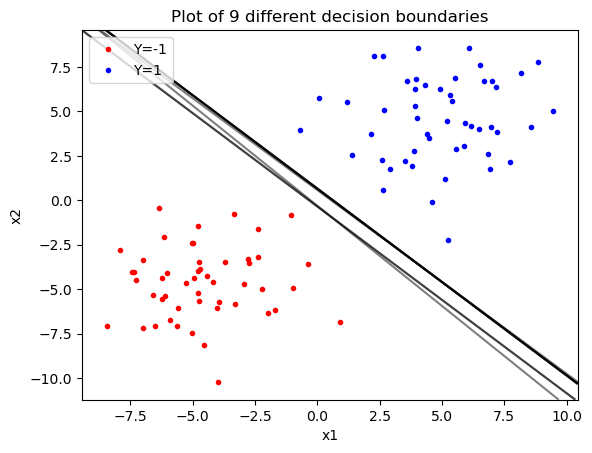

In [3]:
#plot the points
ax = plt.gca()
plt.plot(X[0:50,0],X[0:50,1],'r.',label="Y=-1")
plt.plot(X[50:,0],X[50:,1],'b.',label="Y=1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Plot of 9 different decision boundaries")
plt.legend()

C_vals_to_test = np.array([1e-4,3e-2,5e-2,1e-1,1,3,7,20,1e8])
num_sv = np.zeros(C_vals_to_test.size)


for i in range(0,C_vals_to_test.size):

    clf = svm.SVC(kernel="linear",C=C_vals_to_test[i])
    clf.fit(X,Y.transpose()[0])
    num_sv[i] = clf.n_support_.sum()

    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        plot_method="contour",
        colors="k",
        levels=[0],
        alpha=0.5,
        linestyles=["-"],
        ax=ax,
    )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


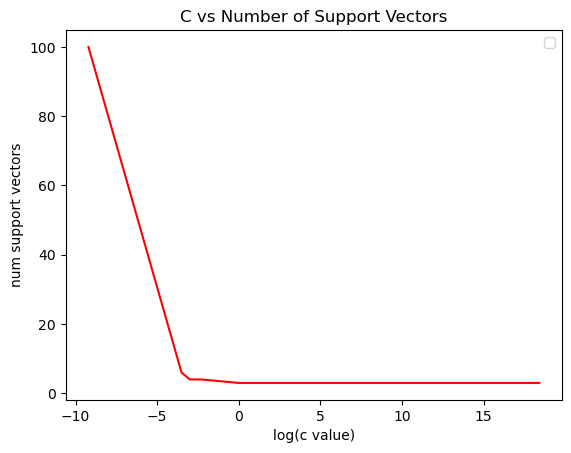

In [4]:
ax = plt.gca()
plt.plot(np.log(C_vals_to_test),num_sv,'r-')
plt.xlabel("log(c value)")
plt.ylabel("num support vectors")
plt.title("C vs Number of Support Vectors")
plt.legend()

As the value of C increases, the number of support vectors decreases exponentially. 

# Problem 5
## Problem 5.1

See Overleaf writeup


## Problem 5.2

In [27]:
import csv
# define several support funcitons


def load_dict(file_name):
    """read the dictionary file and save it into a dictionary

    Args:
        file_name (string): the path to the dictionary file

    Returns:
        dict: the parsed dictionary
    """

    #open the file
    f = open(file_name,'r')

    #load dict file into a list using csvread
    file_data = csv.reader(f,delimiter=' ')

    #convert list into dictionary object
    data_dict = {}
    for row in file_data:
        data_dict[row[0]] = int(row[1])
    
    #return the dictionary and close the file
    f.close()
    return data_dict

def load_movie_reviews(file_name,word_dict):
    #open the movie reviews csv
    f = open(file_name,'r')

    #load the movie reviews into a list using csvread
    file_data = csv.reader(f,delimiter="\t")

    #initialize a list of reviews
    labels = []
    reviews = []

    #for each review, create a dictionary of all of words in the review\
    for review in file_data:

        #save the label
        labels.append(int(review[0]))

        #parse and save the review
        reviews.append(parse_review(review[1],word_dict))

        #save it in the list of reviews
    return labels,reviews
    
def parse_review(review,word_dict):
    #split the review into a list of words
    review_words = review.split()

    review_dict = {}
    #for each word
    for word in review_words:

        #if the word is in word_dict, add the word_dict key
        if word in word_dict:
            idx = word_dict[word]
            review_dict[idx] = 1
    
    #return the dictionary with the words
    return review_dict


word_dict = load_dict('dict.txt')
Y,X = load_movie_reviews('moviereview.tsv',word_dict)

print(X[1])

{417: 1, 307: 1, 45: 1, 418: 1, 32: 1, 419: 1, 420: 1, 421: 1, 2: 1, 422: 1, 423: 1, 58: 1, 424: 1, 92: 1, 39: 1, 83: 1, 70: 1, 425: 1, 51: 1, 426: 1, 396: 1, 427: 1, 222: 1, 22: 1, 101: 1, 428: 1, 429: 1, 430: 1, 431: 1, 432: 1, 433: 1, 434: 1, 435: 1, 436: 1, 437: 1, 438: 1, 439: 1, 440: 1, 441: 1, 74: 1, 442: 1, 443: 1, 321: 1, 444: 1, 445: 1, 100: 1, 446: 1, 447: 1, 36: 1, 400: 1, 448: 1, 449: 1, 450: 1, 451: 1, 452: 1, 453: 1, 454: 1, 455: 1, 456: 1, 457: 1, 458: 1, 208: 1, 459: 1, 401: 1, 460: 1, 461: 1, 276: 1, 89: 1, 148: 1, 462: 1, 463: 1, 464: 1, 465: 1, 8: 1, 466: 1, 467: 1, 468: 1, 469: 1, 470: 1, 471: 1, 472: 1, 473: 1, 474: 1, 475: 1, 55: 1, 476: 1, 124: 1, 129: 1, 37: 1, 477: 1, 244: 1, 311: 1, 478: 1, 285: 1, 479: 1, 9: 1, 102: 1, 480: 1, 481: 1, 216: 1, 482: 1, 483: 1, 484: 1, 40: 1, 485: 1, 486: 1, 298: 1, 487: 1, 91: 1, 488: 1, 141: 1, 247: 1, 5: 1, 489: 1, 490: 1, 82: 1, 225: 1, 491: 1, 492: 1, 493: 1, 494: 1, 495: 1, 496: 1, 497: 1, 498: 1, 261: 1, 499: 1, 183: 1, 

## Problem 5.3

In [51]:
from sklearn.model_selection import train_test_split
import math
#declare several support functions

#function to compute dot product efficiently
def compute_sparse_dot_product(theta,x_val):
    sum = 0
    for idx in x_val:
        sum += theta[idx]
    
    #add the last index of theta to the sum as well
    sum += theta[-1]
    return sum

#function to increment the theta
def update_theta(theta,theta_new,eta):
    for i in range(0,len(theta)):
        theta[i] -= eta * theta_new[i]

    return theta


#function to train the model
def train_logistic_regression(x_train,y_train,word_dict, eta=1e-4,num_epochs=30):
    #initialize theta to all zeros
    theta = [0.0] *(len(word_dict) + 1)

    #while the number of epochs is less than num_epochs, update eta
    epoch = 0
    while epoch < num_epochs:
        #initialize a new theta
        theta_new = [0.0] * (len(word_dict) + 1)

        #for each data point
        for i in range(0,len(x_train)):
            x_i = x_train[i]
            y_i = y_train[i]
            #compute theta_xi
            theta_xi = compute_sparse_dot_product(theta,x_i)
            
            #for each feature in that data point
            for idx in x_i:
                if y_i == 1:
                    theta_new[idx] -= (1/(1 + math.exp(theta_xi)))
                
                elif y_i == 0:
                    theta_new[idx] += (1/(1 + math.exp(-1 * theta_xi)))

            #for the "last" feature in each data point (p+1 feature)
            if y_i == 1:
                theta_new[-1] -= (1/(1 + math.exp(theta_xi)))
            else:
                theta_new[-1] += (1/(1 + math.exp(-1 * theta_xi)))
        
        #update theta
        theta = update_theta(theta, theta_new,eta) 
        epoch += 1
    return theta

def predict_values(x_values,word_dict,theta):
    y_predicted = []

    for x in x_values:
        theta_x = compute_sparse_dot_product(theta,x)
        p_y_1 = (1/(1 + math.exp(-1 * theta_x)))

        if p_y_1 > 0.5:
            y_predicted.append(1)
        else:
            y_predicted.append(0)
    
    return y_predicted

#split the data into testing and training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

theta = train_logistic_regression(X_train,Y_train,word_dict,1e-4,100)

In [52]:
#measure the training error and the testing error
import sklearn.metrics

#compute training error
y_predicted = predict_values(X_train,word_dict,theta)
training_accuracy = sklearn.metrics.accuracy_score(Y_train,y_predicted)

#compute testing error
y_predicted = predict_values(X_test,word_dict,theta)
testing_accuracy = sklearn.metrics.accuracy_score(Y_test,y_predicted)

out_string = "Training Accuracy {:0.3f}%\nTesting Accuracy: {:0.3f}%".format(training_accuracy,testing_accuracy)
print(out_string)


Training Accuracy 0.993%
Testing Accuracy: 0.875%
